	
ASSIGNMENT 2 - VIP

Group 07 - The Parallelepipeds

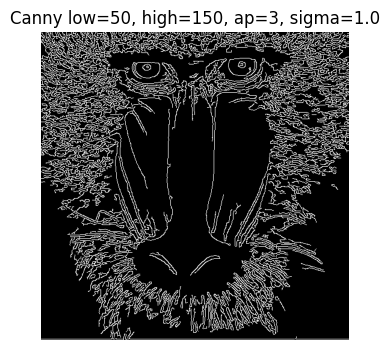

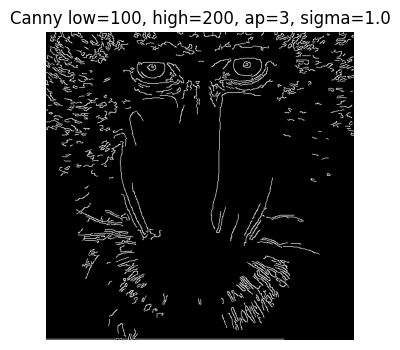

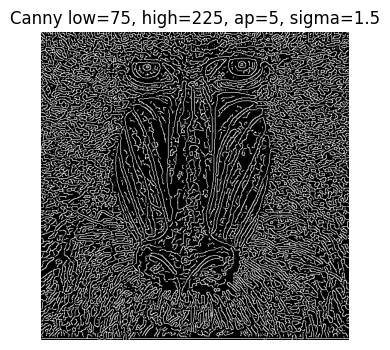

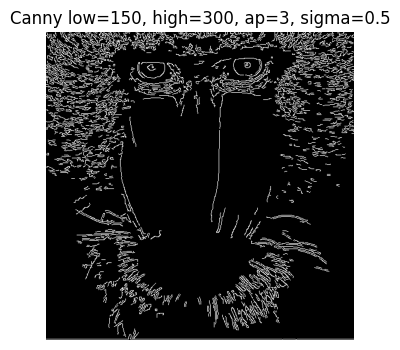

In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_gray(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img.astype(np.float32) / 255.0

# converts to black and white and diveds pixel value by 255 to get the values in the range of 0-1.

def gaussian_blur(img, sigma):
    if sigma <= 0:
        return img
    k = int(6*sigma + 1)
    if k % 2 == 0: k += 1
    return cv2.GaussianBlur(img, (k, k), sigma)

# applies gaussian blur to the image, in order to soften it and remove noise 

def run_canny(img, low, high, aperture, sigma_pre):
    sm = gaussian_blur(img, sigma_pre)
    sm_uint8 = (sm * 255).astype(np.uint8)
    edges = cv2.Canny(sm_uint8, low, high, apertureSize=aperture, L2gradient=True)
    return edges.astype(np.float32) / 255.0

#this function runs the canny algorithm with selected thresholds (parameters) and outputs an image of edges extracted from the original image 

def show(img, title):
    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
    plt.show()

def main():
    img = load_gray("mandrill.jpg")
    params = [
        (50, 150, 3, 1.0),
        (100, 200, 3, 1.0),
        (75, 225, 5, 1.5),
        (150, 300, 3, 0.5)
    ]
# different sets of tuning options (parameters) for Canny:

    for (low, high, ap, sig) in params:
        edges = run_canny(img, low, high, ap, sig)
        title = f"Canny low={low}, high={high}, ap={ap}, sigma={sig}"
        show(edges, title)

# loops through each set of paramaters and outputs the corresponding image 

if __name__ == "__main__":
    main()


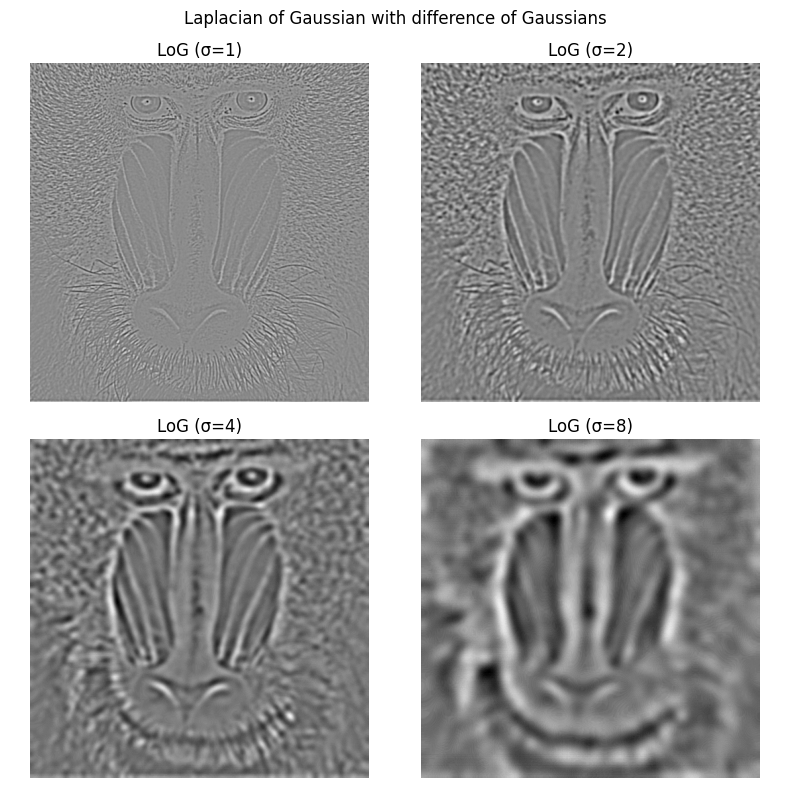

In [5]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

sigma = [1,2,4,8]
kernel_size = 3 

img = cv2.imread('mandrill.jpg', cv2.IMREAD_GRAYSCALE)  #includes greyscaling

#cv2.imshow('image', img) #creates GUI
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# plotting
def plot_LoG(edges, sigma_values, title="LoG"):
    plt.figure(figsize=(8, 8))
    plt.suptitle(title)
    #plt.subplot(2, 3, 1)
    #plt.imshow(img, cmap='gray')
    #plt.title("Original")
    plt.axis("off")

    for i, sigma in enumerate(sigma_values, start=1):
        plt.subplot(2, 2, i)
        plt.imshow(edges[sigma], cmap='gray')
        plt.title(f"LoG (σ={sigma})")
        plt.axis("off")

    plt.tight_layout()
    plt.show()
    

def LoG_with_DoG(img, sigma_values, k=1.6): # k = 1.6 seems to be a standard choice for this 
    """Laplacian of Gaussian with difference of Gaussians"""

    results = {}

    for s in sigma_values:
        
        # Apply Gaussian blur to image with current sigma
        blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=s, sigmaY=s)
        # Apply Gaussian blur to image with current sigma * k
        k_blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=k*s, sigmaY=k*s)
        # Convert to float and compute the difference of Gaussians
        gDiff = cv2.subtract(k_blurred.astype(np.float32), blurred.astype(np.float32)) 

        results[s] = gDiff

    return results


LoG_with_DoG_imgs = LoG_with_DoG(img, sigma)
plot_LoG(LoG_with_DoG_imgs, sigma, "Laplacian of Gaussian with difference of Gaussians")

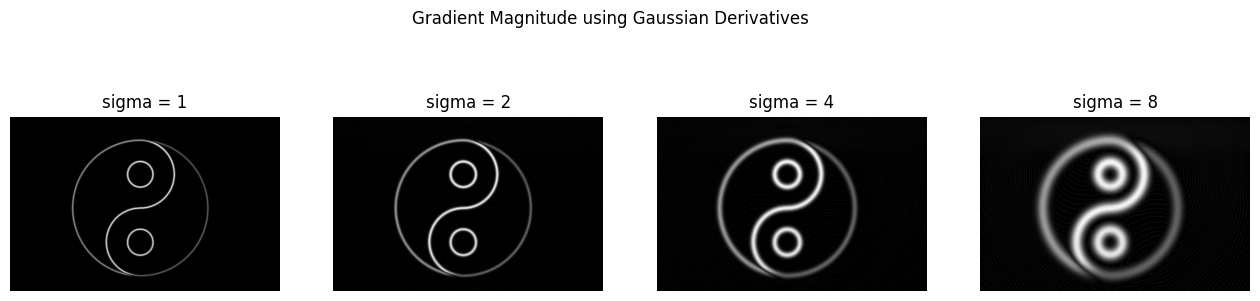

In [6]:
img2 = cv2.imread('yinyang.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(16, 4))
sigma = [1, 2, 4, 8]
for i, s in enumerate(sigma):

    blurred = cv2.GaussianBlur(img2, (0, 0), sigmaX=s, sigmaY=s)
    
    Ix = cv2.Sobel(blurred, cv2.CV_32F, 1, 0, ksize=3) 
    Iy = cv2.Sobel(blurred, cv2.CV_32F, 0, 1, ksize=3)  

    grad_mag = cv2.magnitude(Ix, Iy)

    grad_mag_norm = grad_mag / grad_mag.max()
    
    plt.subplot(1, len(sigma), i + 1)
    plt.imshow(grad_mag_norm, cmap='gray')
    plt.title(f"sigma = {s}")
    plt.axis("off")
    

plt.suptitle("Gradient Magnitude using Gaussian Derivatives")
plt.show()

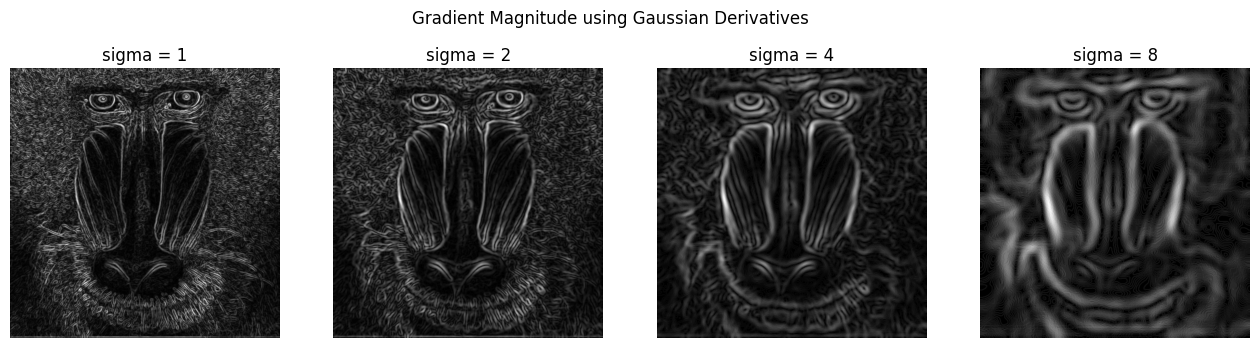

In [7]:
plt.figure(figsize=(16, 4))
sigma = [1, 2, 4, 8]

#compute gradient magnitude for each scale
for i, s in enumerate(sigma):

#Gaussian smoothing at scale s
    blurred = cv2.GaussianBlur(img, (0, 0), sigmaX=s, sigmaY=s)

#First order Gaussian derivatives (approx with Sobel after smoothing)    
    Ix = cv2.Sobel(blurred, cv2.CV_32F, 1, 0, ksize=3) 
    Iy = cv2.Sobel(blurred, cv2.CV_32F, 0, 1, ksize=3)  

#gradient magnitude
    grad_mag = cv2.magnitude(Ix, Iy)

#nomalise for consistent display across sigma values
    grad_mag_norm = grad_mag / grad_mag.max()

#plotting    
    plt.subplot(1, len(sigma), i + 1)
    plt.imshow(grad_mag_norm, cmap='gray')
    plt.title(f"sigma = {s}")
    plt.axis("off")
    

plt.suptitle("Gradient Magnitude using Gaussian Derivatives")
plt.show()

##### Filter images and detect edges - implement, perform & evaluate

**WORK FLOW**

**1) Get image**



    For each sigma value:

**2) Compute/apply Gaussian filtering**
Compare images across sigma values and explain in detail what can be seen

**3) Compute gradient magnitude**
corresponds to first derivative of the Gaussian - G(x), G(y)
Get images for ech sigma and explain in detail what can be seen and how the results differ

**4) Compute Laplacian-Gaussian filtering**
Corresponds to the second derivative of the Gausian. 
Compare images across sigmas and explain in detail what can be seen and how the results differ

**5) Apply Canny (or similar) edge detection**



*Describe the parameter values and their impact on the result. Select what you think is a set of good parameter values, apply, show and decribe the result*

In [8]:
#packages
import numpy as np 
import cv2
import  matplotlib.pyplot as plt
#from PIL import Image, ImageFilter

sigma = [1.0,2.0,4.0,8.0]
#kernel = 3x3

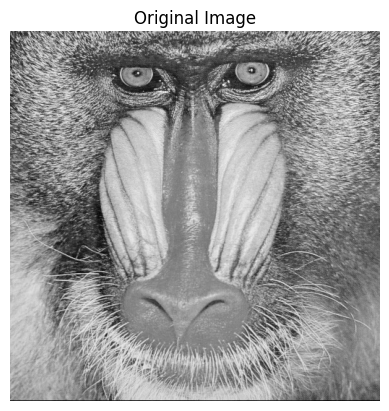

In [9]:
#get image
img = cv2.imread('mandrill.jpg', cv2.IMREAD_GRAYSCALE)  #includes greyscaling

plt.imshow(img, cmap='gray')  
plt.title('Original Image')
plt.axis('off')               
plt.show()

The Gaussian filtering runs over a neighbourhood and filters, computes a weighted average of pixel neighbours --> thereby "smoothing" or blurring the image. Or smoothing out/reducing the noice.  

Ergo, convolution with a Gaussian kernel returns a new pixel that is a weighted average of its neighbours. 

The function is used to compute kernel values. 'x' and 'y' are coordinates inrelation to the center of the kernel grid - in accordance to the Gaussian distribution, i.e. the center is 0 (and weighs the most)

The kernel grid is thus: 
(-1,-1) (-1,0) (-1,-1)
(0,-1), (0,0), (0,1)
(1,-1), (1,0), (1,1)

And then we just put these x and y oordinates/values into the formula and compute kernel values. Easy peasy lemon squeexy or something ... :)


To compute the averages / Or to apply the Gaussian Filtering: 
Formula for the convolution - sum for two coordinates (so the sum for x-u, G(x) and for y-v, G(y))

u and v are kernel indecies/coordinates -> so I(x-u)(y-v) is the pixel_i's position away from the kernel center?

- pick neighbourhood
- slide kernel over each neighbourhood
- subtract kernel_x from pixel_x and kernel_y from pixel_y (??? ), and multiply each pixel coordinate in neighbourhood with corresponding kernel weight 


In [10]:
## "by hand"

# 0) transform image to float
img =  img.astype(np.float32) / 255.0  # /255..0 to normalize pixel values to 0-1 values bc Gaussian kernel values sum to 1

# 1) Build kernel
def gaus_kernel(kernel_size, sigma):
    kernel = np.zeros((kernel_size, kernel_size),dtype=np.float32)
    coord = [-1,0,1]

    #compute Gaussian kernel values/weights
    for i,x in enumerate(coord):
        for j,y in enumerate(coord):
            kernel[i,j] = (1/(2*np.pi*sigma**2)*np.exp(-(x**2 + y**2)/(2*sigma**2)))

    return kernel


gaus_kernel(3,5)

# 2) Apply kernel, i.e convolve
def convolve(img, kernel, kernel_size):
    height = img.shape[0]
    width = img.shape[1]
    k_h = kernel.shape[0]
    k_w = kernel.shape[1]
    values = np.zeros_like(img)  

     ## app. "padding" is needed - otherwise the kernel cannot handle the edges of the image duh
    #pad_height = kernel_size // 2
    pad_width = kernel_size // 2

    padded_img = np.pad(img, pad_width, mode='edge') #copy nearest values and add as "edge"

    #for each pixel - 
    for i in range(height): #for each row
        for j in range(width): #for each column

            neighbourhood = padded_img[i:i+k_h, j:j+k_w] #get image neighboorhood (same 3x3 size as kernel)
            values[i,j] = np.sum(neighbourhood * kernel) 
    return values


my_Gaussian = convolve(img, gaus_kernel(3,1),3)

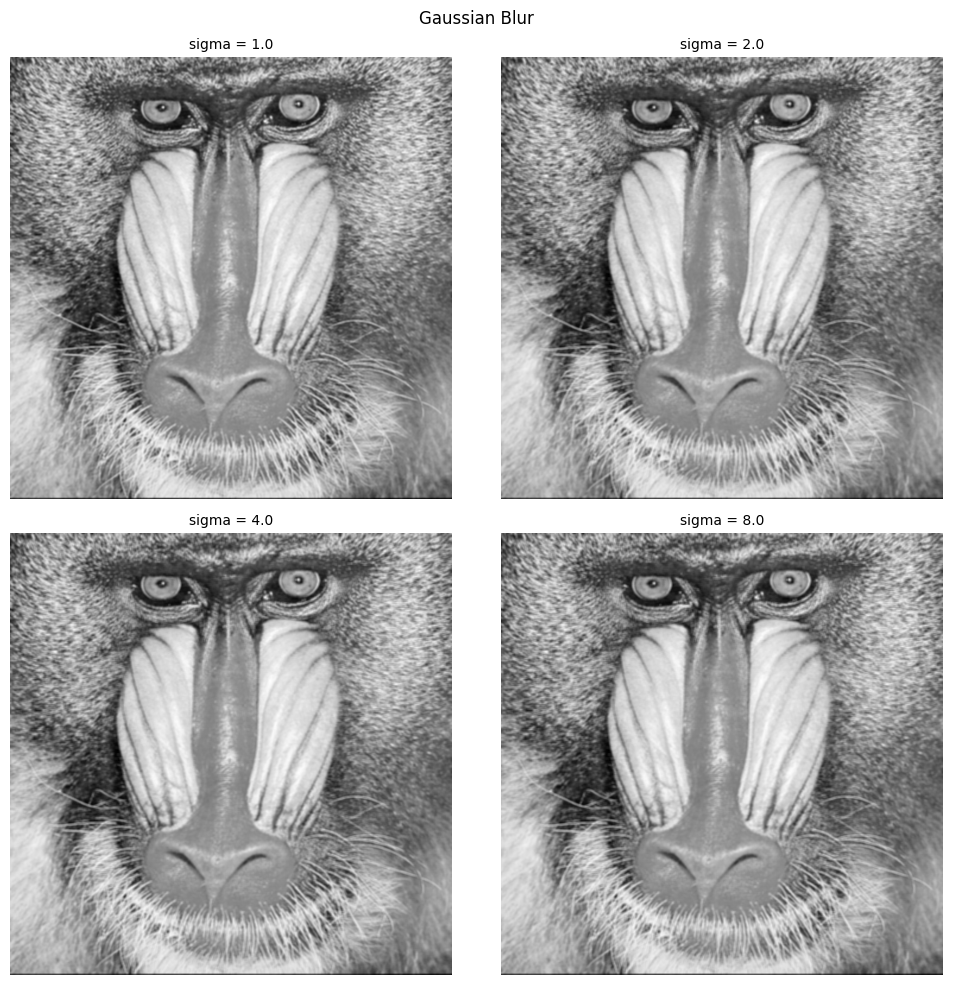

In [11]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()

for i,s in enumerate(sigma):
    my_Gaussian = convolve(img, gaus_kernel(3,s),3)
    
    ax[i].imshow(my_Gaussian, cmap='gray')  
    #ax[sigma.index(i)].set_title(f'Gaussian Blurred Image (sigma={i})')
    ax[i].axis('off')
    ax[i].set_title(f'sigma = {s}', fontsize=10)
fig.suptitle(f'Gaussian Blur')
plt.tight_layout()
plt.show()

#### **comments to the blurring**
After applying the Gaussian filtering, the image is smoothed (or blurred) increasingly as the sigma value increases. However the smoothing is very very fait. 

We chose a kernel size 3x3, which is a quite small neighbourhood to average over. Hence the blurring effect is quite subtle, despite the increasing sigma values which affect the magnitude of the blur.  

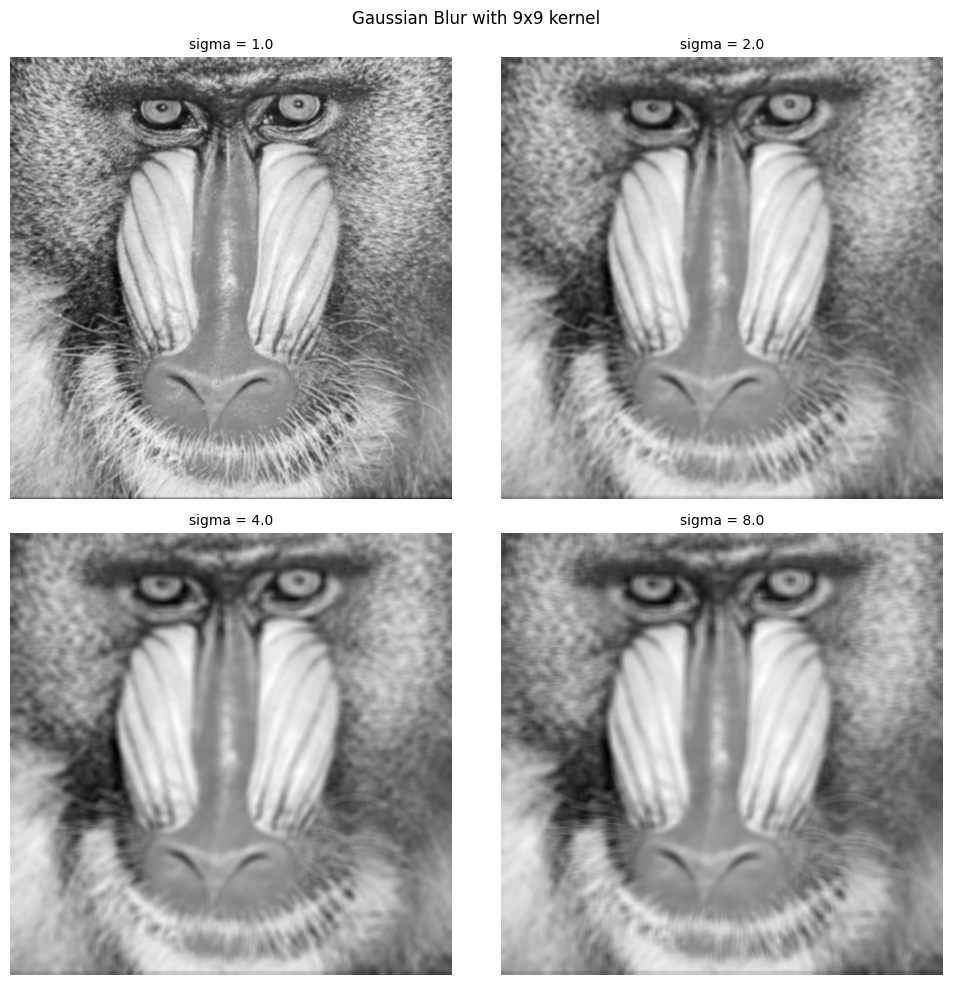

In [12]:
# Bluring - Apply Gaussian filter 
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax = ax.flatten()

for i,s in enumerate(sigma):
    gaus = cv2.GaussianBlur(img,(9,9), s)
    
    ax[i].imshow(gaus, cmap='gray')  
    #ax[sigma.index(i)].set_title(f'Gaussian Blurred Image (sigma={i})')
    ax[i].axis('off')
    ax[i].set_title(f'sigma = {s}', fontsize=10)
fig.suptitle(f'Gaussian Blur with 9x9 kernel')
plt.tight_layout()
plt.show()


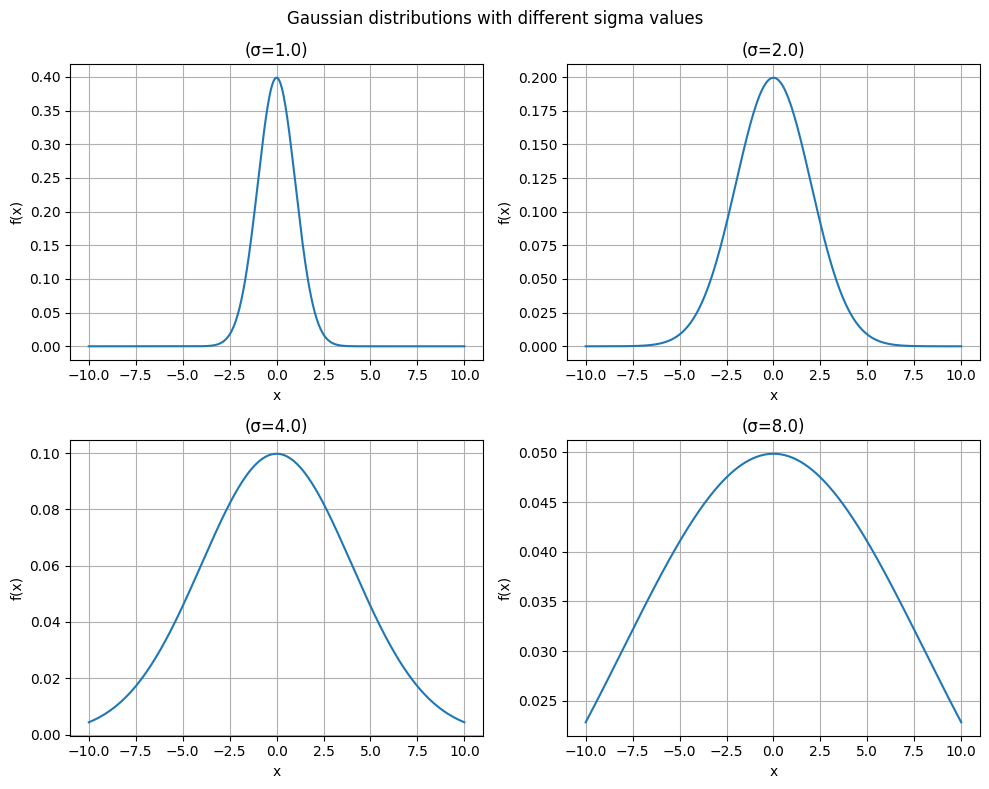

In [14]:
## Plotting the Gaussian itself - illustrate sigma variation

#  the function
def gaussian_1d(x, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-x**2 / (2 * sigma**2))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

# for each sigma 
for ax, s in zip(axs, sigma):
    x = np.linspace(-10, 10, 400)
    y = gaussian_1d(x, s)
    ax.plot(x, y, label=f'sigma = {s}')
    ax.set_title(f'(σ={s})')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)

fig.suptitle('Gaussian distributions with different sigma values')
plt.tight_layout()
plt.show()